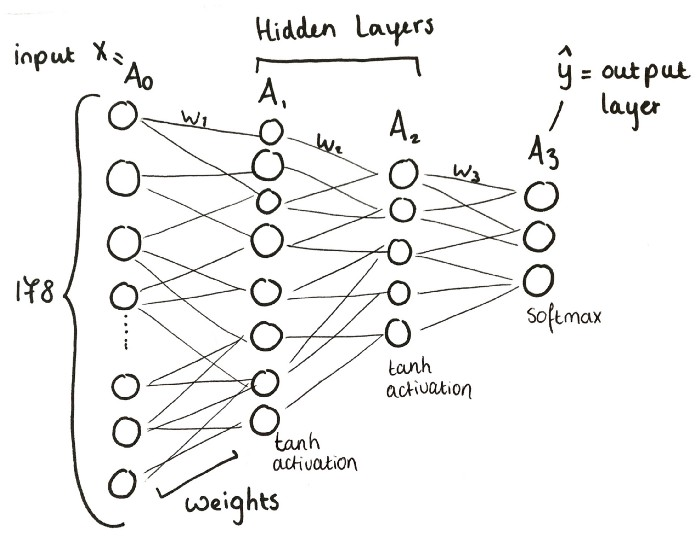

In short:

-   The input layer (x) consists of 178 neurons.
-   A1, the first layer, consists of 8 neurons.
-   A2, the second layer, consists of 5 neurons.
-   A3, the third and output layer, consists of 3 neurons.

<center>Step 1: The Data Pre-Processing</center>

In [14]:
#importing all the libraries and dataset
import pandas as pd
import numpy as np

df = pd.read_csv('W1data.csv')
df.head()

# Package imports
# Matplotlib 
import matplotlib
import matplotlib.pyplot as plt

# SciKitLearn is a machine learning utilities library
import sklearn

# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [15]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivar 1,Cultivar 2,Cultivar 3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1,0,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1,0,0


<center>Step 2: Initialization </center>

Before we can use our weights, we have to initialize them. Because we don't have values to use for the weights yet, we use random values between 0 and 1.

In Python, the `random.seed` function generates "random numbers." However, random numbers are not truly random. The numbers generated are pseudorandom, meaning the numbers are generated by a complicated formula that makes it look random. In order to generate numbers, the formula takes the previous value generated as its input. If there is no previous value generated, it often takes the time as a first value.

That is why we seed the generator --- to make sure that we always get the same random numbers. We provide a fixed value that the number generator can start with, which is zero in this case.

In [16]:
np.random.seed(0)

<center>Step 3: Forward Propogation </center>

After we have initialized the weights with a pseudo-random number, we take a linear step forward. We calculate this by taking our input A0 times the dot product of the random initialized weights plus a bias. We started with a bias of 0. This is represented as:


![Image for post](https://miro.medium.com/max/258/1*ctstMNEEn-orZcvip1DLrw.png)

Now we take our z1 (our linear step) and pass it through our first activation function. ctivation functions are very important in neural networks. **They introduce non-linear properties to our functions by converting the linear input to a non-linear output, making it possible to represent more complex functions.**

For this model, we chose to use the tanh activation function for our two hidden layers **A1 and A2** which gives us an output value between -1 and 1.

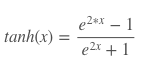

Since this is a multi-class classification problem (we have 3 output labels), we will use the softmax function for the output layer **A3** because this will compute the probabilities for the classes by spitting out a value between 0 and 1.

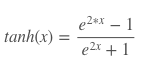

In [17]:
# This is the forward propagation function

def forward_prop(model,a0):
    
    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    
    # Do the first Linear step 
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Put through second activation function
    a2 = np.tanh(z2)
    
    #Third linear step
    z3 = a2.dot(W3) + b3
    
    #For the Third linear activation function we use the softmax function
    a3 = softmax(z3)
    
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache

By passing z1 through the activation function, we have created our first hidden layer — A1 — which can be used as input for the computation of the next linear step, z2.

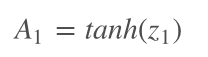

<center>Step 4: Back Propogation </center>

After we forward propagate through our NN, we backward propagate our error gradient to update our weight parameters. We know our error, and want to minimize it as much as possible.

We do this by taking the derivative of the error function, with respect to the weights (W) of our NN, using gradient descent.

In reality, gradient descent looks more like this:

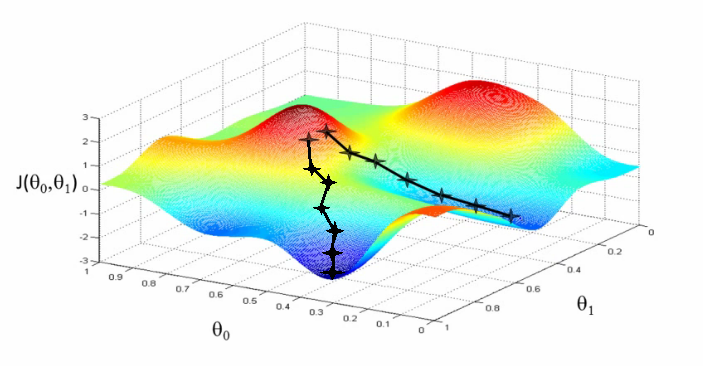

We always start with calculating the slope of the loss function with respect to z, the slope of the linear step we take.

Notation is as follows: dv is the derivative of the loss function, with respect to a variable v.

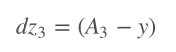

Next we calculate the slope of the loss function with respect to our weights and biases. Because this is a 3 layer NN, we will iterate this process for z3,2,1 + W3,2,1 and b3,2,1. Propagating backwards from the output to the input layer.

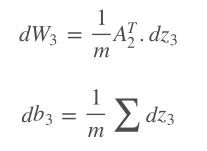

In [18]:
# This is the backward propagation function
def backward_prop(model,cache,y):
# Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Load forward propagation results
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate loss derivative with respect to output
    dz3 = loss_derivative(y=y,y_hat=a3)
# Calculate loss derivative with respect to second layer weights
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calculate loss derivative with respect to second layer bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calculate loss derivative with respect to first layer
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calculate loss derivative with respect to first layer weights
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calculate loss derivative with respect to first layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

<center>Step 5: Training Phase </center>

In order to reach the optimal weights and biases that will give us the desired output (the three wine cultivars), we will have to train our neural network.

The learning rate is the multiplier to update the parameters. It determines how rapidly they can change. If the learning rate is low, training will take longer. However, if the learning rate is too high, we might miss a minimum. The learning rate is expressed as:
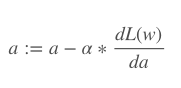

-   *a* is the learning rate called *alpha*
-   dL(w) is the derivative of the total loss with respect to our weight w
-   da is the derivative of *alpha*

In [22]:
# This is what we return at the end
model = initialise_parameters(nn_input_dim=13, nn_hdim= 5, nn_output_dim= 3)
model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.plot(losses)

NameError: name 'initialise_parameters' is not defined